## Урок 7. Многомерный статистический анализ. Линейная регрессия

#### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 

#### zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 

#### ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 

#### Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [109]:
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

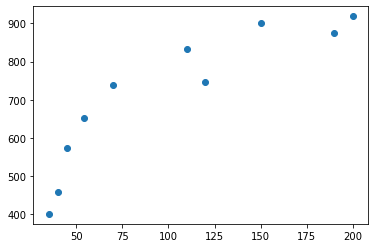

In [110]:
import matplotlib.pyplot as plt
plt.scatter(zp, ks)

with intercept

In [111]:
import numpy as np
X = np.array(zp)
y = np.array(ks)

In [112]:
n = len(X)

In [113]:
b = (n * np.sum(X*y) - (np.sum(X) * np.sum(y))) / (n * np.sum(X**2) - np.sum(X)**2)
b

2.6205388824027653

In [114]:
a = np.mean(y) - b * np.mean(X) # это наша мат модель
a

444.17735732435955

In [115]:
y_hat = a + b * X
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [116]:
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

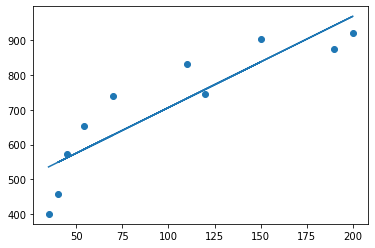

In [117]:
plt.scatter(zp, ks)
plt.plot(X, y_hat)

with intercept matrix method

In [10]:
import seaborn as sbs

In [11]:
X_m = X.reshape((n, 1))
X_m

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [12]:
y_m = y.reshape((n, 1))
y_m

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [13]:
X_m = np.hstack([np.ones((n,1)), X_m])
X_m

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [14]:
B_m = np.dot(np.linalg.inv(X_m.T @ X_m), X_m.T@y_m) # умножать матрицы и веторы можно @ и dot()
B_m

array([[444.17735732],
       [  2.62053888]])

without intercept

In [15]:
y_hat_without = b * X
y_hat_without

array([ 91.71886088, 117.92424971, 497.90238766, 524.10777648,
       104.8215553 , 183.43772177, 141.50909965, 393.08083236,
       314.46466589, 288.25927706])

In [16]:
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

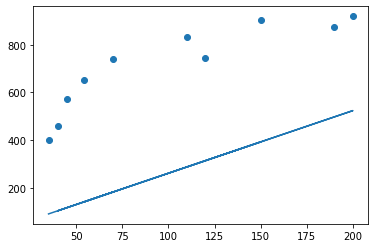

In [17]:
plt.scatter(zp, ks)
plt.plot(X, y_hat_without)

плохая модель получилась

without intercept matrix method

In [18]:
X_m_without = X.reshape((n, 1))
X_m_without

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [19]:
y_m_without = y.reshape((n, 1))
y_m_without

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [20]:
B_m_without = np.dot(np.linalg.inv(X_m_without.T @ X_m_without), X_m_without.T@y_m_without)
B_m_without

array([[5.88982042]])

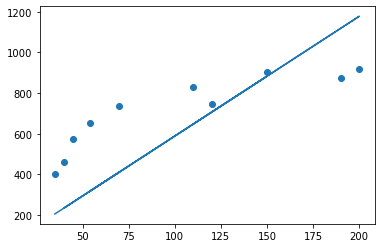

In [21]:
plt.scatter(zp, ks)
plt.plot(X, B_m_without[0]*X)

#### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [232]:
X = np.array(zp)
y = np.array(ks)

In [233]:
def mse_(B1, y=y, X=X, n=10):
    return np.sum((B1*X - y)**2) / n

In [234]:
alpha = 1e-6
alpha

1e-06

In [235]:
B1 = 0.1
n = len(X)

In [236]:
for i in range(1000):
    B1 -= alpha * (2/n) * np.sum((B1*X - y) *X)
    if i%50 == 0:
        print(f'Iteration {i:03}: B1 = {B1:.15f}, mse = {mse_(B1):.10f}')

Iteration 000: B1 = 0.259528080000000, mse = 493237.7212546963
Iteration 050: B1 = 4.497229618367758, mse = 83233.9447298283
Iteration 100: B1 = 5.545378422452230, mse = 58151.3182317111
Iteration 150: B1 = 5.804626485478126, mse = 56616.8490680939
Iteration 200: B1 = 5.868748638669329, mse = 56522.9755012938
Iteration 250: B1 = 5.884608547059329, mse = 56517.2326380596
Iteration 300: B1 = 5.888531320728348, mse = 56516.8813093602
Iteration 350: B1 = 5.889501575592372, mse = 56516.8598162739
Iteration 400: B1 = 5.889741557447199, mse = 56516.8585014005
Iteration 450: B1 = 5.889800914315978, mse = 56516.8584209611
Iteration 500: B1 = 5.889815595583751, mse = 56516.8584160401
Iteration 550: B1 = 5.889819226833643, mse = 56516.8584157390
Iteration 600: B1 = 5.889820124983314, mse = 56516.8584157206
Iteration 650: B1 = 5.889820347130743, mse = 56516.8584157195
Iteration 700: B1 = 5.889820402076462, mse = 56516.8584157194
Iteration 750: B1 = 5.889820415666681, mse = 56516.8584157194
Iterati

In [237]:
mse_(5.889820420132676)

56516.8584157194

#### 3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Таблица значений функции Лапласа используется при **известной** дисперсии случайной величины (среднеквадратичного отклонения)

Таблица критических точек распределения Стьюдента используется при **неизвестной** дисперсии случайной величины (среднеквадратичного отклонения)

#### 4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [269]:
X = np.array(zp)
y = np.array(ks)

In [270]:
def mse_(B0, B1, y=y, X=X, n=8):
    return np.sum((B0 + B1*X - y)**2) / n

In [271]:
B0 = 0.1
B1 = 0.1
n = len(X)
B0, B1, n

(0.1, 0.1, 10)

In [272]:
alpha = 7e-5
alpha

7e-05

In [273]:
for i in range(800000):
    y_pred = B0 + B1*X
    B0 -= alpha * (2/n) * np.sum(y_pred - y)
    B1 -= alpha * (2/n) * np.sum((y_pred - y) *X)
    if i%50000 == 0:
        print(f'Iteration {i:6d}: B0 = {B0:.15f}, B1 = {B1:.15f}, mse = {mse_(B0, B1):.15f}')

Iteration      0: B0 = 0.197952400000000, B1 = 11.265545999999999, mse = 568512.682694747345522
Iteration  50000: B0 = 368.967853409883162, B1 = 3.174114083245096, mse = 9881.577530373493573
Iteration 100000: B0 = 431.438105796995103, B1 = 2.714305405990807, mse = 8139.476383065230948
Iteration 150000: B0 = 442.019537886248656, B1 = 2.636421387494038, mse = 8089.494139822470970
Iteration 200000: B0 = 443.811858243231086, B1 = 2.623229117236298, mse = 8088.060110206325589
Iteration 250000: B0 = 444.115447798500497, B1 = 2.620994563884863, mse = 8088.018966776044181
Iteration 300000: B0 = 444.166870870114337, B1 = 2.620616067342338, mse = 8088.017786338881706
Iteration 350000: B0 = 444.175581091685274, B1 = 2.620551956260567, mse = 8088.017752471215317
Iteration 400000: B0 = 444.177056459794869, B1 = 2.620541096898982, mse = 8088.017751499527549
Iteration 450000: B0 = 444.177306362856655, B1 = 2.620539257501958, mse = 8088.017751471648808
Iteration 500000: B0 = 444.177348692321289, B1 = 